In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle
from scipy.stats import t, norm, skewnorm, cauchy, chi2

import os
os.chdir("../")
os.getcwd()

'/home/mario/PhD/spatial_lda'

In [2]:
import spatial_mix.utils as spmix_utils
import spatial_mix.hdp_utils as hdp_utils

In [3]:
import matplotlib
matplotlib.rcParams['text.usetex'] = True
TITLE_FONT_SIZE = 14
AXIS_FONT_SIZE = 12

In [4]:
xgrid = np.linspace(-10, 10, 1000)

true_dens_scenario12 = [
    t.pdf(xgrid, 6, -4, 1), t.pdf(xgrid, 6, -4, 1),
    skewnorm.pdf(xgrid, 4, 4, 1), skewnorm.pdf(xgrid, 4, 4, 1),
    chi2.pdf(xgrid, 3, 0, 1), chi2.pdf(xgrid, 3, 0, 1)
]

true_dens_scenario3 = [
    t.pdf(xgrid, 6, -4, 1), t.pdf(xgrid, 6, -4, 1),
    skewnorm.pdf(xgrid, 4, 4, 1), skewnorm.pdf(xgrid, 4, 4, 1),
    cauchy.pdf(xgrid, 0, 1), cauchy.pdf(xgrid, 0, 1)
]

In [5]:
spmix_folder = "data/simulation1/spmix/dens"
hdp_folder = "data/simulation1/hdp/dens"
jo_folder = "data/simulation1/jo/dens"

### SPMIX

In [ ]:
hell_dists_spmix = []
kl_divs_spmix = []

for scen in range(3):
    print("Scen: {0}".format(scen))
    curr_hell = []
    curr_kl = []
    for rep in range(100):
        print("\rRep: {0}".format(rep), end=" ", flush=True)
        
        densfile = os.path.join(spmix_folder, "scenario{0}/rep{1}.pickle".format(scen, rep))
        with open(densfile, 'rb') as fp:
            dens = pickle.load(fp)
        
        if scen < 2:
            for loc in range(6):
                curr_hell.append(
                    (scen, rep, loc, 
                     np.mean(spmix_utils.post_hellinger_dist(
                        dens["dens"][loc], true_dens_scenario12[loc], xgrid))))
                
                curr_kl.append(
                    (scen, rep, loc, 
                     np.mean(spmix_utils.post_kl_div(
                        dens["dens"][loc], true_dens_scenario12[loc], xgrid))))
        else:
            for loc in range(6):
                curr_hell.append(
                    (scen, rep, loc, 
                     np.mean(spmix_utils.post_hellinger_dist(
                        dens["dens"][loc], true_dens_scenario3[loc], xgrid))))
                
                curr_kl.append(
                    (scen, rep, loc, 
                     np.mean(spmix_utils.post_kl_div(
                        dens["dens"][loc], true_dens_scenario3[loc], xgrid))))
                
    hell_dists_spmix += curr_hell
    kl_divs_spmix += curr_kl

In [ ]:
hell_spmix_df = pd.DataFrame(hell_dists_spmix, columns=["Scenario", "Rep", "Location", "Dist"])
kl_spmix_df = pd.DataFrame(kl_divs_spmix, columns=["Scenario", "Rep", "Location", "Dist"])

hell_spmix_df.to_csv("data/simulation1/spmix/dens/hell_results.csv")
kl_spmix_df.to_csv("data/simulation1/spmix/dens/kl_results.csv")

### HDP

In [ ]:
hell_dists_hdp = []
kl_divs_hdp = []

for scen in range(3):
    print("Scen: {0}".format(scen))
    curr_hell = []
    curr_kl = []
    for rep in range(100):
        print("\rRep: {0}".format(rep), end=" ", flush=True)
        
        densfile = os.path.join(hdp_folder, "scenario{0}/rep{1}.pickle".format(scen, rep))
        with open(densfile, 'rb') as fp:
            dens = pickle.load(fp)
        
        if scen < 2:
            for loc in range(6):
                curr_hell.append(
                    (scen, rep, loc, 
                     np.mean(spmix_utils.post_hellinger_dist(
                        dens["dens"][loc], true_dens_scenario12[loc], xgrid))))
                
                curr_kl.append(
                    (scen, rep, loc, 
                     np.mean(spmix_utils.post_kl_div(
                        dens["dens"][loc], true_dens_scenario12[loc], xgrid))))
        else:
            for loc in range(6):
                curr_hell.append(
                    (scen, rep, loc, 
                     np.mean(spmix_utils.post_hellinger_dist(
                        dens["dens"][loc], true_dens_scenario3[loc], xgrid))))
                
                curr_kl.append(
                    (scen, rep, loc, 
                     np.mean(spmix_utils.post_kl_div(
                        dens["dens"][loc], true_dens_scenario3[loc], xgrid))))
                
    hell_dists_hdp += curr_hell
    kl_divs_hdp += curr_kl

In [ ]:
hell_hdp_dp = pd.DataFrame(hell_dists_hdp, columns=["Scenario", "Rep", "Location", "Dist"])
kl_hdp_df = pd.DataFrame(kl_divs_hdp, columns=["Scenario", "Rep", "Location", "Dist"])

hell_hdp_dp.to_csv("data/simulation1/hdp/dens/hell_results.csv")
kl_hdp_df.to_csv("data/simulation1/hdp/dens/kl_results.csv")

### JO

In [ ]:
hell_dists_jo = []
kl_divs_jo = []
for scen in range(3):
    print("Scen: {0}".format(scen))
    curr_hell = []
    curr_kl = []
    for rep in range(100):
        print("\rRep: {0}".format(rep), end=" ", flush=True)
        
        densfile = os.path.join(jo_folder, "scenario{0}/rep{1}.pickle".format(scen, rep))
        with open(densfile, 'rb') as fp:
            dens = pickle.load(fp)

        hell_dists_jo += dens['hell_dits']
        kl_divs_jo += dens["kl_divs"]

In [ ]:
hell_jo_df = pd.DataFrame(hell_dists_jo, columns=["Scenario", "Rep", "Location", "Dist"])
kl_jo_df = pd.DataFrame(kl_divs_jo, columns=["Scenario", "Rep", "Location", "Dist"])

hell_jo_df.to_csv("data/simulation1/jo/dens/hell_results.csv")
kl_jo_df.to_csv("data/simulation1/jo/dens/kl_results.csv")

## TABLES - HELLINGER

In [ ]:
spmix_df = pd.read_csv("data/simulation1/spmix/dens/hell_results.csv")
hdp_df = pd.read_csv("data/simulation1/hdp/dens/hell_results.csv")
jo_df = pd.read_csv("data/simulation1/jo/dens/hell_results.csv")

table = []
for scen in range(3):
    curr_spmix = spmix_df[spmix_df["Scenario"] == scen]
    curr_hdp = hdp_df[hdp_df["Scenario"] == scen]
    curr_jo = jo_df[jo_df["Scenario"] == scen]
    
    means_spmix = []
    means_hdp = []
    means_jo = []
    stddevs_spmix = []
    stddevs_hdp = []
    stddevs_jo = []
    for loc in range(6):
        means_spmix.append(
            np.mean(curr_spmix[curr_spmix["Location"] == loc]["Dist"]))
        stddevs_spmix.append(
            np.std(curr_spmix[curr_spmix["Location"] == loc]["Dist"]))
        
        means_hdp.append(
            np.mean(curr_hdp[curr_hdp["Location"] == loc]["Dist"]))
        stddevs_hdp.append(
            np.std(curr_hdp[curr_hdp["Location"]== loc]["Dist"]))
        
        means_jo.append(
            np.mean(curr_jo[curr_jo["Location"] == loc]["Dist"]))
        stddevs_jo.append(
            np.std(curr_jo[curr_jo["Location"]== loc]["Dist"]))
    
    row1 = [r"${0:.2f} \pm {1:.2f}$".format(m ,s) for m, s in zip(means_spmix, stddevs_hdp)]
    row1 = "Scenario {0} & spmix & ".format(scen + 1) + " & ".join(row1) + r"\\"
    
    row2 = [r"${0:.2f} \pm {1:.2f}$".format(m ,s) for m, s in zip(means_hdp, stddevs_hdp)]
    row2 = "& HDP & ".format(scen + 1) + " & ".join(row2) + r"\\"
    
    row3 = [r"${0:.2f} \pm {1:.2f}$".format(m ,s) for m, s in zip(means_jo, stddevs_jo)]
    row3 = "& CK-SSM & ".format(scen + 1) + " & ".join(row3) + r"\\"
    
    table.append(row1)
    table.append(row2)
    table.append(row3)
    
    table.append(r"\hline")
    
for row in table:
    print(row)

## TABLES -KL

In [ ]:
spmix_df = pd.read_csv("data/simulation1/spmix/dens/kl_results.csv")
hdp_df = pd.read_csv("data/simulation1/hdp/dens/kl_results.csv")
jo_df = pd.read_csv("data/simulation1/jo/dens/kl_results.csv")

table = []
for scen in range(3):
    curr_spmix = spmix_df[spmix_df["Scenario"] == scen]
    curr_hdp = hdp_df[hdp_df["Scenario"] == scen]
    curr_jo = jo_df[jo_df["Scenario"] == scen]
    
    means_spmix = []
    means_hdp = []
    means_jo = []
    stddevs_spmix = []
    stddevs_hdp = []
    stddevs_jo = []
    for loc in range(6):
        means_spmix.append(
            np.mean(curr_spmix[curr_spmix["Location"] == loc]["Dist"]))
        stddevs_spmix.append(
            np.std(curr_spmix[curr_spmix["Location"] == loc]["Dist"]))
        
        means_hdp.append(
            np.mean(curr_hdp[curr_hdp["Location"] == loc]["Dist"]))
        stddevs_hdp.append(
            np.std(curr_hdp[curr_hdp["Location"]== loc]["Dist"]))
        
        means_jo.append(
            np.mean(curr_jo[curr_jo["Location"] == loc]["Dist"]))
        stddevs_jo.append(
            np.std(curr_jo[curr_jo["Location"]== loc]["Dist"]))
    
    row1 = [r"${0:.2f} \pm {1:.2f}$".format(m ,s) for m, s in zip(means_spmix, stddevs_hdp)]
    row1 = "Scenario {0} & spmix & ".format(scen + 1) + " & ".join(row1) + r"\\"
    
    row2 = [r"${0:.2f} \pm {1:.2f}$".format(m ,s) for m, s in zip(means_hdp, stddevs_hdp)]
    row2 = "& HDP & ".format(scen + 1) + " & ".join(row2) + r"\\"
    
    row3 = [r"${0:.2f} \pm {1:.2f}$".format(m ,s) for m, s in zip(means_jo, stddevs_jo)]
    row3 = "& CK-SSM & ".format(scen + 1) + " & ".join(row3) + r"\\"
    
    table.append(row1)
    table.append(row2)
    table.append(row3)
    
    table.append(r"\hline")
    
for row in table:
    print(row)

## PLOTS

In [6]:
import pystan

ngroups = 6
W = np.zeros((ngroups, ngroups))
W[0, 1] = W[1, 0] = 1
W[2, 3] = W[3, 2] = 1
W[4, 5] = W[5, 4] = 1

def eval_stan_density(stanfit, xgrid):
    means = stanfit.extract("means")["means"]
    variances = stanfit.extract("vars")["vars"]
    weights = stanfit.extract("weights")["weights"]
    out = []
    num_iters = means.shape[0]
    num_components = means.shape[1]

    means = means.reshape(-1)
    stddevs = np.sqrt(variances.reshape(-1))
    allgrid = np.hstack([xgrid.reshape(-1, 1)] * means.shape[0])

    eval_normals = norm.pdf(
        allgrid, means, stddevs
    ).reshape(len(xgrid), num_iters, num_components)

    numGroups = weights.shape[1]
    for g in range(numGroups):
        weights_chain = weights[:, g, :]
        out.append(np.sum(eval_normals*weights_chain, axis=-1).T)

    return out



def run_jo(model, datas, ncomp=10):
    data_by_group_stan = []
    max_num_data = np.max([len(x) for x in datas])
    for i in range(6):
        data_by_group_stan.append(
            np.concatenate([datas[i], np.zeros(max_num_data - len(datas[i]))]))

    stan_data = {
        "num_groups": 6,
        "num_data_per_group": [len(x) for x in datas],
        "max_data_per_group": np.max([len(x) for x in datas]),
        "num_components": ncomp,
        "data_by_group": data_by_group_stan,
        "G": W,
        "rho": 0.95,
        "a": 0.1,
        "b": 1.0,
        "points_in_grid": len(xgrid),
        "xgrid": xgrid}

    fit = model.sampling(data=stan_data, iter=1000, n_jobs=1, chains=1)
#     stan_dens = eval_stan_density(fit, xgrid)
    return fit

In [7]:
scen = 0
rep = 1
filename = "data/simulation1/datasets/scenario{0}/rep{1}.csv".format(scen, rep)

df = pd.read_csv(filename)
currdata = []
for g in range(6):
    currdata.append(df[df['group'] == g]['datum'].values)

In [8]:
stan_model = pystan.StanModel(
        file="spatial_mix/resources/mc_car_ssm.stan")

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_da5571de5f682bb6a824e8154e5187a4 NOW.


KeyboardInterrupt: 

In [ ]:
jo_dens = run_jo(stan_model, currdata, ncomp=20)
outfile = os.path.join(jo_folder, "scenario{0}/rep{1}_full.pickle".format(scen, rep))

In [ ]:
with open(outfile, 'wb') as fp:
    pickle.dump({'xgrid': xgrid, 'dens': jo_dens}, fp)

## Scenario 1, random simulation

In [9]:
from spatial_mix.plots import density_plot

TypeError: density_plot() missing 1 required positional argument: 'fill_color'

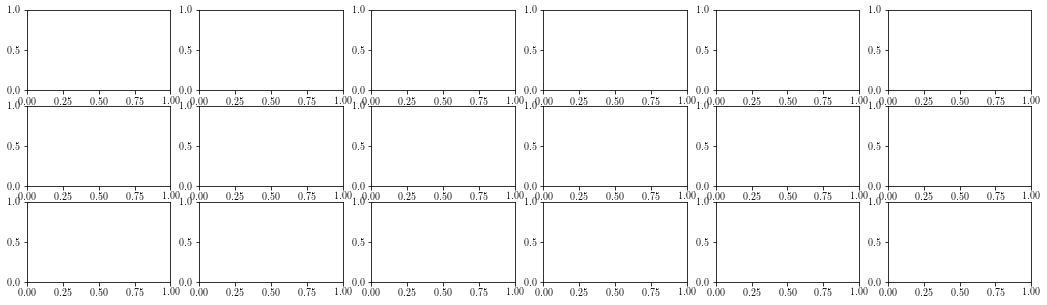

In [10]:
scen = 0
rep = 1

densfile = os.path.join(spmix_folder, "scenario{0}/rep{1}.pickle".format(scen, rep))
    
with open(densfile, 'rb') as fp:
    dens_spmix = pickle.load(fp)["dens"]
    
densfile = os.path.join(hdp_folder, "scenario{0}/rep{1}.pickle".format(scen, rep))
    
with open(densfile, 'rb') as fp:
    dens_hdp = pickle.load(fp)["dens"]
    
    
densfile = os.path.join(jo_folder, "scenario{0}/rep{1}_full.pickle".format(scen, rep))
with open(densfile, 'rb') as fp:
    dens_jo = pickle.load(fp)["dens"]

    
fig, axes = plt.subplots(3, 6, figsize=(18, 5))
for i in range(6):
    density_plot(dens_spmix[i], true_dens_scenario12[i], xgrid, axes[0][i], "Area {0}".format(i+1))
    density_plot(dens_hdp[i], true_dens_scenario12[i], xgrid, axes[1][i])
    density_plot(dens_jo[i], true_dens_scenario12[i], xgrid, axes[2][i])

for j in range(3):
    axes[j][0].set_xlim(-10, 1)
    axes[j][1].set_xlim(-10, 1)
    
    axes[j][2].set_xlim(0, 10)
    axes[j][3].set_xlim(0, 10)
    
    axes[j][4].set_xlim(-1, 10)
    axes[j][5].set_xlim(-1, 10)
    
    
axes[0][0].set_ylabel("SP MIX", fontsize=16)
axes[1][0].set_ylabel("HDP", fontsize=16)
axes[2][0].set_ylabel("CK-CAR", fontsize=16)
axes[2][3].legend(bbox_to_anchor=(1.5, -0.2), ncol=3, fontsize=14)

# plt.savefig("scenario1_density.pdf", bbox_inches='tight')
plt.show()

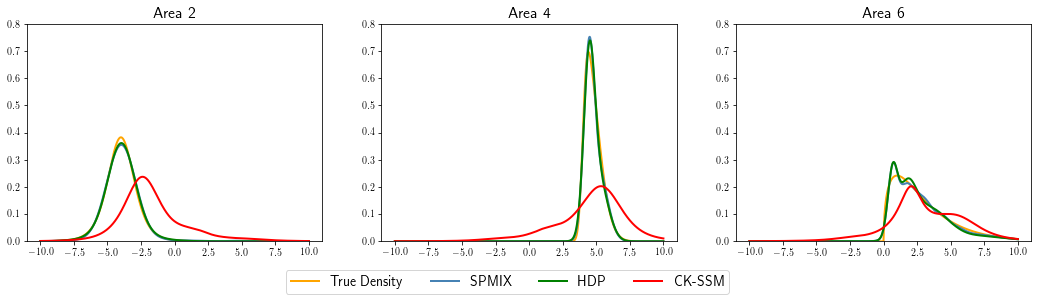

In [13]:
import seaborn as sns

locations = [1, 3, 5]
fig, axes = plt.subplots(1, 3, figsize=(18, 4))

palette = sns.color_palette("hls", 8)

for i, loc in enumerate(locations):
    axes[i].plot(xgrid, true_dens_scenario12[loc], color="orange", lw=2, label="True Density")
    axes[i].plot(xgrid, np.mean(dens_spmix[loc], 0), lw=2, label="SPMIX", color="steelblue")
    axes[i].plot(xgrid, np.mean(dens_hdp[loc], 0), lw=2, label="HDP", color="green")
    axes[i].plot(xgrid, np.mean(dens_jo[loc], 0), lw=2, label="CK-SSM", color="red")
    axes[i].set_title("Area {0}".format(loc+1), fontsize=16)

for i in range(3):
    axes[i].set_ylim(0.0, 0.8)
    
axes[1].legend(bbox_to_anchor=(1.2, -0.1), ncol=4, fontsize=14)
plt.savefig("scenario1_density.pdf", bbox_inches='tight')
plt.show()

## Plot with credible intervals

In [ ]:
from spatial_mix.utils import loadChains

In [ ]:
datas = []
spmix_chains = []
spmix_dens = []
hdp_chains = []
hdp_dens = []
output_path = "data/simulation1/"

for i in range(3):
    data_filename = os.path.join(
        output_path + "data_scenario{0}.csv".format(i+1))
    datas.append(pd.read_csv(data_filename))
    
    spmix_chains_filename = os.path.join(
        output_path + "spmix_chains_scenario{0}.recordio".format(i+1))
    spmix_chains.append(loadChains(spmix_chains_filename))
    
    spmix_dens_filename = os.path.join(
        output_path + "spmix_dens_scenario{0}.pickle".format(i+1))
    with open(spmix_dens_filename, "rb") as fp:
        spmix_dens.append(pickle.load(fp))
    
    hdp_chains_filename = os.path.join(
        output_path + "hdp_chains_scenario{0}.recordio".format(i+1))
    hdp_chains.append(loadChains(hdp_chains_filename))
    
    hdp_dens_filename = os.path.join(
        output_path + "hdp_dens_scenario{0}.pickle".format(i+1))
    with open(hdp_dens_filename, "rb") as fp:
        hdp_dens.append(pickle.load(fp))

In [ ]:
from spatial_mix.plots import density_plot

xgrid = spmix_dens[0]["xgrid"]

fig, axes = plt.subplots(2, 4, figsize=(14, 6))

scenario = 1
density_plot(spmix_dens[scenario]["dens"][3], skewnorm.pdf(xgrid, 4, 4, 1), xgrid, axes[0][0], 
             "steelblue", "lightblue", "Scenario 2, Area 4")
density_plot(spmix_dens[scenario]["dens"][5], chi2.pdf(xgrid, 3, 0, 1), xgrid, axes[0][1],
             "steelblue", "lightblue", "Scenario 2, Area 6")

scenario = 2
density_plot(spmix_dens[scenario]["dens"][3], skewnorm.pdf(xgrid, 4, 4, 1), xgrid, axes[0][2],
             "steelblue", "lightblue", "Scenario 3, Area 4")
density_plot(spmix_dens[scenario]["dens"][5], cauchy.pdf(xgrid, 0, 1), xgrid, axes[0][3],
            "steelblue", "lightblue", "Scenario 3, Area 6")

scenario = 1
density_plot(hdp_dens[scenario]["dens"][3], skewnorm.pdf(xgrid, 4, 4, 1), xgrid, axes[1][0],
             "green", "yellowgreen", "Scenario 2, Area 4",  alpha=0.4)
density_plot(hdp_dens[scenario]["dens"][5], chi2.pdf(xgrid, 3, 0, 1), xgrid, axes[1][1],
             "green", "yellowgreen", "Scenario 2, Area 6", alpha=0.4)

scenario = 2
density_plot(hdp_dens[scenario]["dens"][3], skewnorm.pdf(xgrid, 4, 4, 1), xgrid, axes[1][2],
             "green", "yellowgreen", "Scenario 3, Area 4", alpha=0.4)
density_plot(hdp_dens[scenario]["dens"][5], cauchy.pdf(xgrid, 0, 1), xgrid, axes[1][3],
             "green", "yellowgreen", "Scenario 3, Area 6",  alpha=0.4)



for i in range(2):
    for j in range(4):
        axes[i][j].set_ylim((0, 0.8))
    
    axes[i][1].set_xlim((-1, 10))
    axes[i][0].set_xlim((2, 10))
    axes[i][2].set_xlim((2, 10))

plt.subplots_adjust(hspace = 0.5)
axes[0][0].set_ylabel("SP MIX", fontsize=16)
axes[1][0].set_ylabel("HDP", fontsize=16)

axes[0][2].legend(bbox_to_anchor=(0.7, -0.15), ncol=3)
axes[1][2].legend(bbox_to_anchor=(0.7, -0.15), ncol=3)

# plt.savefig("images/simulation1_densities.pdf")
plt.show()

# Posterior number of clusters

In [7]:
import pystan

stan_model = pystan.StanModel(
        file="spatial_mix/resources/mc_car_ssm.stan")

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_78baffe8223bdcf24cdda9a902398e15 NOW.


In [9]:
# Jo

df = pd.read_csv("data/simulation1/datasets/scenario1/rep0.csv")
currdata = []
for g in range(6):
    currdata.append(df[df['group'] == g]['datum'].values)
jo_fit = run_jo(stan_model, currdata, ncomp=20)

In [10]:
with open("ex_jo_fit_20comp.pickle", "wb") as fp:
    pickle.dump({"model": stan_model, "fit": jo_fit}, fp)

<ipython-input-10-3926dd37434a>:2: UserWarning: Pickling fit objects is an experimental feature!
The relevant StanModel instance must be pickled along with this fit object.
When unpickling the StanModel must be unpickled first.
  pickle.dump({"model": stan_model, "fit": jo_fit}, fp)


In [11]:
# get number of clusters from Jo

def sample_multinomial(probas):
    s = np.cumsum(probas, axis=-1)
    r = np.random.rand(np.prod(probas.shape[:-1])).reshape(probas.shape[:-1])
    r = np.expand_dims(r, -1)
    k = (s < r).sum(axis=-1)
    return k

def get_clusters_jo(jo_fit, data):
    weights = jo_fit.extract("weights")["weights"]
    means = jo_fit.extract("means")["means"]
    stddevs = np.sqrt(jo_fit.extract("vars")["vars"])
    niter = means.shape[0]
    ncomp = means.shape[1]
    clus = []
    data_idx = 0
    for i, group in enumerate(data):
        grid = np.hstack([group.reshape(-1, 1)] * means.shape[0])
        probas = np.zeros((niter, len(group), ncomp))
        for j in range(ncomp):
            eval_normals = norm.logpdf(grid, loc=means[:,j ], scale=stddevs[:, j]).T
            probas[:, :, j] = eval_normals + weights[:, i, j].reshape(-1, 1)
        
        norm_probas = np.exp(probas)
        norm_probas = norm_probas / np.expand_dims(np.sum(norm_probas, axis=-1), axis=2)
        clus.append(sample_multinomial(probas))
    return clus


def nclus_chains(clus_chains):
    ngroups = len(clus_chains)
    niter = len(clus_chains[0])
    out = np.zeros((niter, ngroups))
    for i in range(ngroups):
        out[:, i] = [len(np.unique(x)) for x in clus_chains[i]]
    return out

In [12]:
clusters_jo = get_clusters_jo(jo_fit, currdata)

In [13]:
nclus_jo = nclus_chains(clusters_jo)
print([np.mean(nclus_jo[:, i]) for i in range(6)])

[1.002, 1.0, 1.036, 1.01, 1.048, 1.02]


In [14]:
weights = jo_fit.extract("weights")["weights"]
means = jo_fit.extract("means")["means"]
stddevs = np.sqrt(jo_fit.extract("vars")["vars"])
vars = jo_fit.extract("vars")["vars"]
niter = means.shape[0]
ncomp = means.shape[1]
clus = []
data_idx = 0
i = 0
group = currdata[0]
grid = np.hstack([group.reshape(-1, 1)] * means.shape[0])
probas = np.zeros((niter, len(group), ncomp))
for j in range(ncomp):
    eval_normals = norm.logpdf(grid, loc=means[:,j ], scale=vars[:, j]).T
    probas[:, :, j] = eval_normals + weights[:, i, j].reshape(-1, 1)

norm_probas = np.exp(probas)
norm_probas = norm_probas / np.expand_dims(np.sum(norm_probas, axis=-1), axis=2)

In [15]:
means[0, :]

array([ 7.21628922, -0.3057669 , -0.74781207,  2.4755267 ,  0.89598148,
        2.56034128,  0.99070946,  3.6270048 , -1.3863372 ,  0.47339831,
       -0.85448727,  5.3659809 , -1.19071329,  0.92523116,  0.52337178,
        4.22327478,  1.24364564, -2.1260082 ,  1.62811261, -4.50203616])

In [16]:
vars[0, :]

array([2.20337448, 0.25485499, 0.56319138, 0.67797796, 0.85049885,
       1.05068015, 0.31965283, 2.677649  , 0.43275722, 1.10652726,
       0.98883461, 0.87614325, 0.59483812, 0.80135417, 0.462956  ,
       0.69893176, 0.36267702, 0.93406243, 0.27735647, 1.01213441])

In [ ]:
group[0]

In [17]:
print(norm_probas[0, 0, :])

[1.19249080e-05 2.93182211e-18 3.98528720e-03 4.55458580e-13
 1.28527640e-04 2.81437754e-06 3.69204967e-28 1.36869121e-02
 2.24118556e-02 1.01521138e-02 1.14691202e-01 5.90749960e-19
 5.25856866e-02 3.94904221e-05 1.20978827e-10 1.25083682e-21
 3.71088758e-25 5.18305509e-01 2.58780808e-51 2.63998676e-01]


In [ ]:
sample_multinomial(norm_probas)

In [ ]:
# SpMix

chains = spmix_utils.loadChains("data/simulation1/spmix/chains/scenario1/rep0.recordio")
clus_spmix = []
for i in range(6):
    clus_spmix.append(np.vstack(
        [x.groupParams[i].cluster_allocs for x in chains]))

In [ ]:
nclus_spmix = nclus_chains(clus_spmix)
print([np.mean(nclus_spmix[:, i]) for i in range(6)])

In [ ]:
h = np.arange(1, 20)
a = 0.1
b = 1
plt.plot(1 - 1.0 / (1 + np.exp(b - a * h)))